In [66]:
import tensorflow as tf
import keras
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator as IDG
from keras import regularizers, optimizers
#Import from keras_preprocessing not from keras.preprocessing

In [67]:
# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [68]:
from keras.models import Sequential, load_model

In [69]:

%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [70]:
img_path = './dataset/'

In [71]:
import shutil
# Create target Directory if don't exist
class_names = sorted(os.listdir(img_path))
if not os.path.exists(img_path + "all"):
    os.mkdir(img_path + "all")
    src_dir = './dataset/'
    # path to destination directory
    dest_dir = './dataset/all'
    # getting all the files in the source directory
    files = os.listdir(src_dir) 
    for i in class_names:
        shutil.copytree(src_dir + i, dest_dir,dirs_exist_ok=True)
class_names.remove("all")

In [72]:
df=pd.DataFrame(columns=("image","lable"))
for i in class_names:
    for j in os.listdir(img_path + "/" + i):
        df.loc[len(df.index)] = [j,i]  
df.to_csv("csv_file.csv")

In [73]:
# Initialize DataGenerator
train_gen = IDG(rescale=1/255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# train_images,train_lables,test_images,test_labels = train_test_split(df["image"],df["lable"],test_size=0.3,shuffle=True)
train_images = train_gen.flow_from_dataframe(dataframe=df,directory=img_path + "/" + "all", x_col="image",y_col="lable", class_mode="categorical", subset='training', shuffle=True, batch_size=32,target_size=(256,256))
test_images = train_gen.flow_from_dataframe(dataframe= df,directory=img_path + "/" + "all",x_col="image",y_col="lable", class_mode="categorical", subset='validation', shuffle=True, batch_size=32,target_size=(256,256))


Found 5490 validated image filenames belonging to 11 classes.
Found 1372 validated image filenames belonging to 11 classes.


In [74]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same',input_shape=(256,256,3)))
model.add(layers.Activation("relu"))
model.add(layers.Conv2D(512, (5, 5)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(11, activation='softmax'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [75]:
print(len(model.layers))

8


In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 activation_8 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 512)     410112    
                                                                 
 activation_9 (Activation)   (None, 252, 252, 512)     0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 512)    0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 126, 126, 512)     0         
                                                      

In [78]:
name = "sequential"
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

In [ ]:

history=model.fit(train_images,
                    validation_data=test_images,callbacks=cbs,
                    epochs=10)
# model=load_model('sequential.h5')

In [79]:
model=load_model('sequential.h5')

1/1 [==============================] - 0s 91ms/step


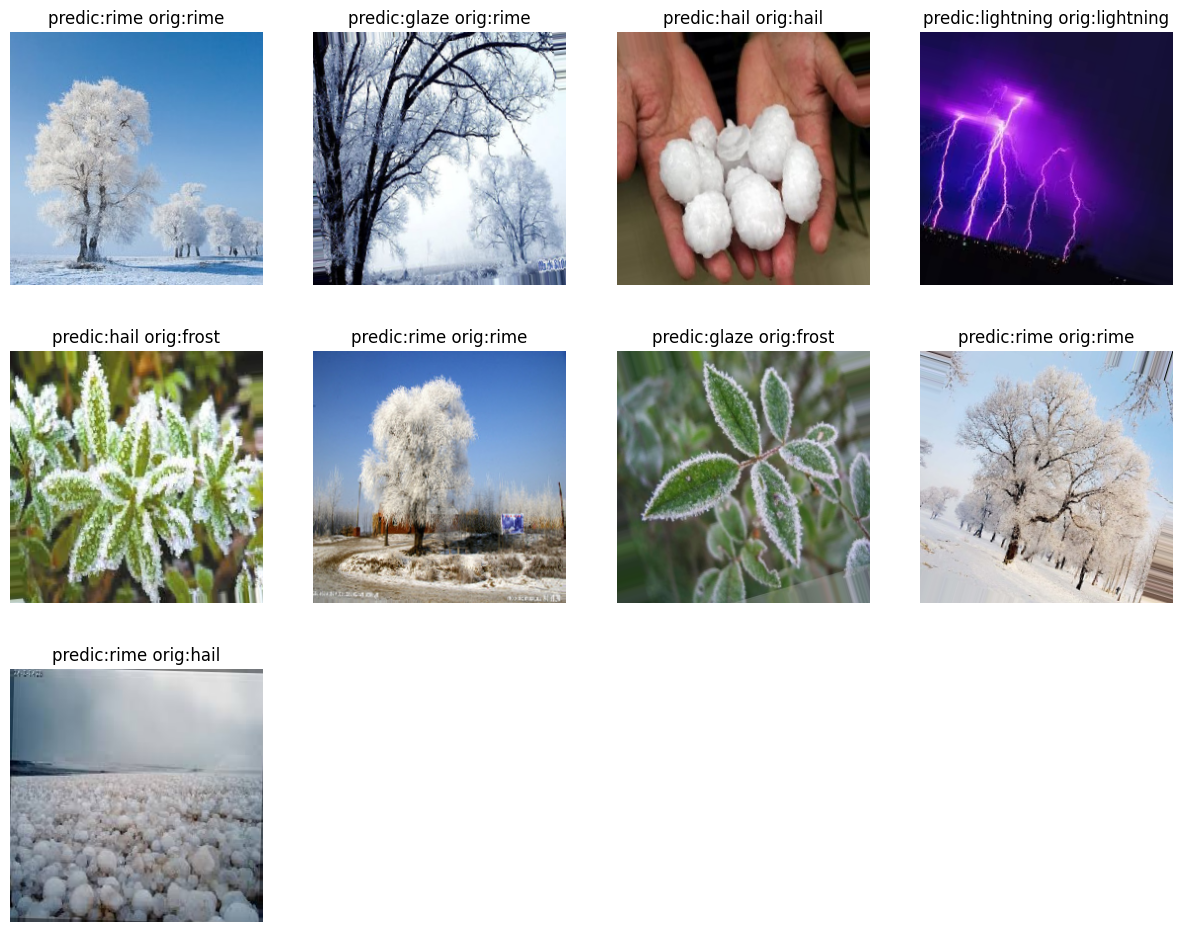

In [80]:
i=1
plt.figure(figsize=(15,20))
for images, labels in train_images:
    id = np.random.randint(len(images))
    image= images[id]
    label=list(labels[id]).index(1)
    pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
    plt.subplot(5, 4, i)
    plt.imshow(image)
    plt.title(f"Org: {class_names[label]},Pred: {pred_label}")
    plt.axis('off')
    plt.title(f"predic:{pred_label} orig:{class_names[label]}")
    i+=1
    if i>=10: 
        break


In [ ]:
from keras.models import Sequential, load_model
model=load_model("sequential.h5")

In [ ]:
from PIL import Image
from resizeimage import resizeimage
img_path=input("enter path of Image")
img=Image.open("download.jpg")
plt.imshow(img)
# image=image.resize((64,64,3))
image = resizeimage.resize_contain(img, [256, 256])
image = image.convert("RGB")
image = np.array(image)
print(image.shape)
pred_label = class_names[np.argmax(model.predict(image[np.newaxis,...]))]
# pred_label=model.predict(image)
print(pred_label)